In [18]:
import pandas as pd

# Reading from the file (make sure you have your file in the same directory)
df = pd.read_csv('ViewingActivity.csv')

# Checking initial amount of rows and columns
df.shape

(12226, 10)

In [19]:
# Checking the first row
df.head(1)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Dina,2024-04-30 00:28:35,00:01:18,NaN,Trailer: Hack Your Health: The Secrets of Your...,TRAILER,LG 2016 MStar M2 Standard DTV Smart TV,00:01:18,00:01:18,EG (Egypt)


In [20]:
# Dropping unnecessary columns for this analysis
df = df.drop(['Profile Name', 'Attributes', 'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark', 'Country'], axis=1)
df.head(1)

,Start Time,Duration,Title
0,2024-04-30 00:28:35,00:01:18,Trailer: Hack Your Health: The Secrets of Your...


In [21]:
# Checking datatypes
df.dtypes

Start Time    object
Duration      object
Title         object
dtype: object

In [22]:
# Changing the Start Time column's datatype to be Date/Time
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
df.dtypes

Start Time    datetime64[ns, UTC]
Duration                   object
Title                      object
dtype: object

In [23]:
# Converting timezone from UTC to EST

df = df.set_index('Start Time')

df.index = df.index.tz_convert('US/Eastern')

df = df.reset_index()

df.head(1)

,Start Time,Duration,Title
0,2024-04-29 20:28:35-04:00,00:01:18,Trailer: Hack Your Health: The Secrets of Your...


In [24]:
# Converting Duration datatype to timedelta
df['Duration'] = pd.to_timedelta(df['Duration'])
df.dtypes

Start Time    datetime64[ns, US/Eastern]
Duration                 timedelta64[ns]
Title                             object
dtype: object

In [25]:
# Filtering to only select columns that have the show 'Suits'
suits = df[df['Title'].str.contains('Suits', regex=False)]

suits.shape

(255, 3)

In [26]:
# Filtering out short durations
suits = suits[(suits['Duration'] > '0 days 00:01:00')]

suits.shape

(220, 3)

In [27]:
# Getting total time spent watching Suits
suits['Duration'].sum()

Timedelta('4 days 06:22:58')

In [28]:
# Finding what days of the week the user has watched the most episodes
suits['weekday'] = suits['Start Time'].dt.weekday
# Finding which hours of the day the user most often started watching Suits
suits['hour'] = suits['Start Time'].dt.hour

suits.head(1)

,Start Time,Duration,Title,weekday,hour
908,2022-04-25 08:11:42-04:00,0 days 00:18:19,Suits: Season 1: Pilot Part 1 & 2 (Episode 1),0,8


<Axes: title={'center': 'Suits Episodes Watched by Day'}, xlabel='weekday'>

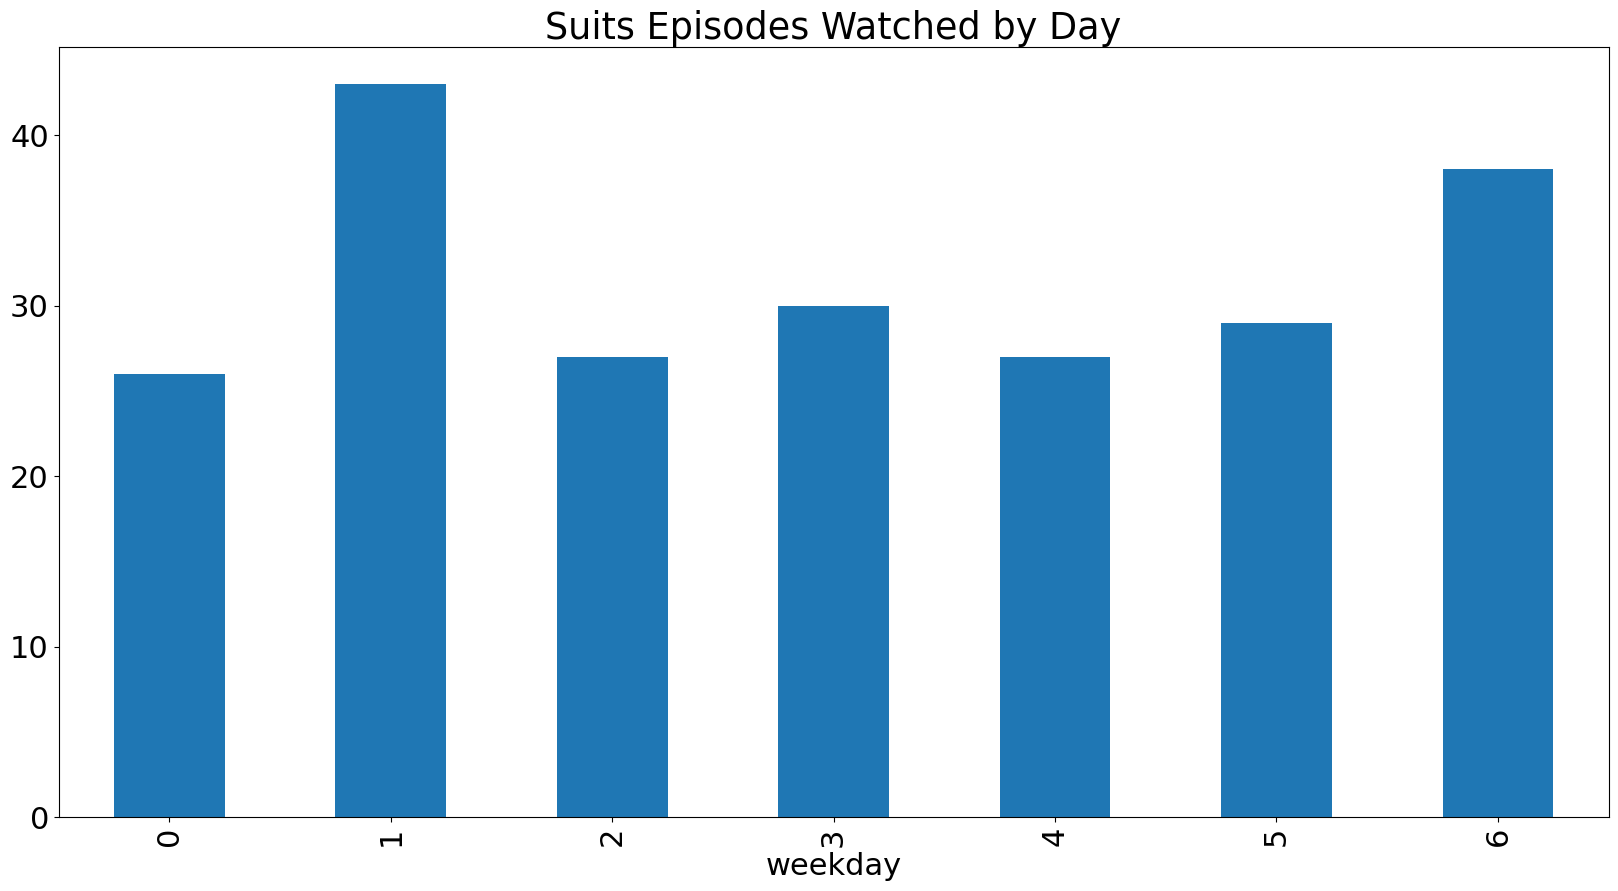

In [29]:
import matplotlib

# Set categorical and define the order so the days are plotted monday-sunday
suits['weekday'] = pd.Categorical(suits['weekday'], categories=[0,1,2,3,4,5,6], ordered=True)

# Create suits_by_day and count the rows for each weekday, assigning the result to that variable
suits_by_day = suits['weekday'].value_counts()

# Sort the index using our categorical, so that monday is first, tuesday is second, etc.
suits_by_day = suits_by_day.sort_index()

# Making the font size larger to be easier to read
matplotlib.rcParams.update({'font.size': 22})

suits_by_day.plot(kind='bar', figsize=(20,10), title='Suits Episodes Watched by Day')

<Axes: title={'center': 'Suits Episodes Watched by Hour'}, xlabel='hour'>

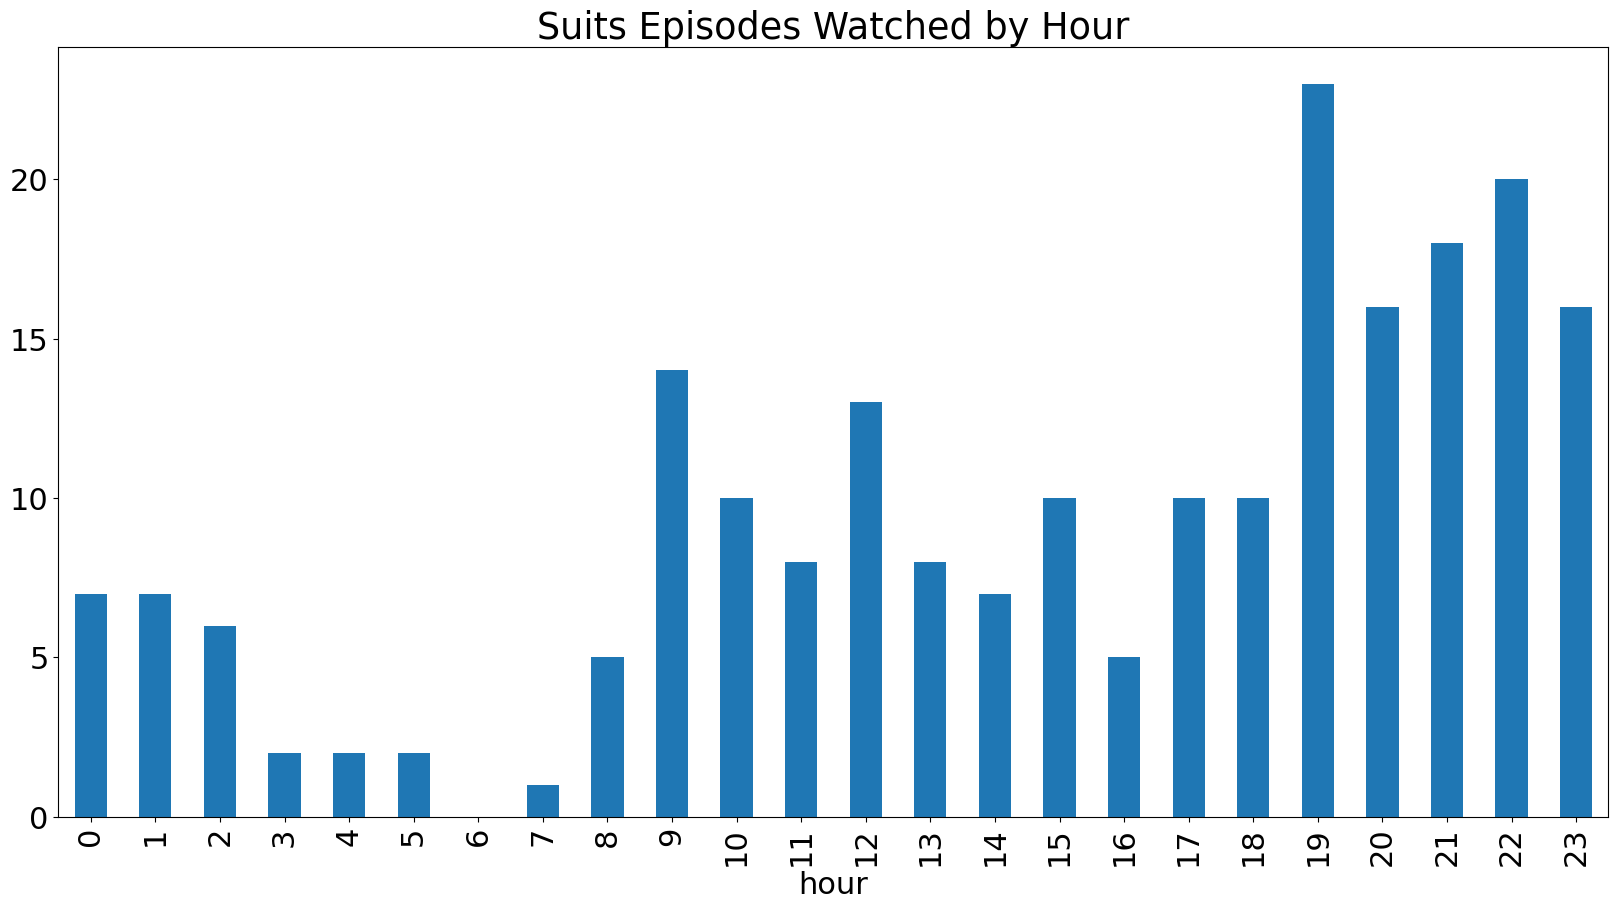

In [30]:
# Set categorical and define the order so the hours are plotted 0-23
suits['hour'] = pd.Categorical(suits['hour'], categories=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], ordered=True)

# Create suits_by_day and count the rows for each hour, assigning the result to that variable
suits_by_hour = suits['hour'].value_counts()

# Sort the index using our categorical, so that midnight is first, 1AM is second, etc.
suits_by_hour = suits_by_hour.sort_index()

# Making the font size larger to be easier to read
matplotlib.rcParams.update({'font.size': 22})

suits_by_hour.plot(kind='bar', figsize=(20,10), title='Suits Episodes Watched by Hour')